In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 데이터 로딩
file_path = "C:/Users/문도/Desktop/인지개 자료/titanic.csv"
df = pd.read_csv(file_path)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [13]:
df.isnull().sum() #결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
Age_mean = df['Age'].mean() # 결측치 제거(Age는 평균으로)
print("평균 나이 : ", Age_mean)

평균 나이 :  29.69911764705882


In [15]:
df['Age'] = df['Age'].fillna(Age_mean)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df = df.dropna() #결측치 제거
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Text(0.5, 1.0, 'Label')

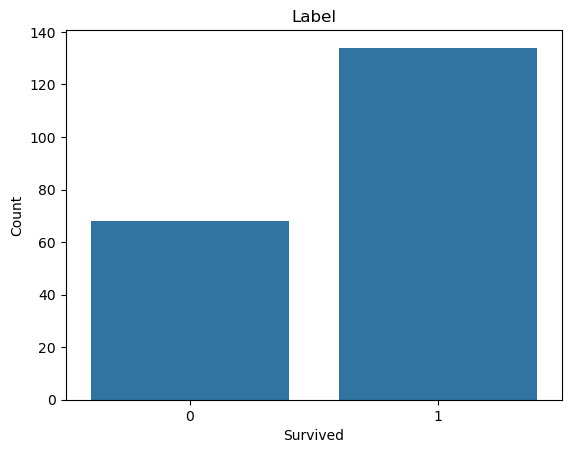

In [18]:
sns.countplot(data = df, x="Survived")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Label")

In [19]:
df = df.drop(columns = ['Name', 'Ticket', 'Cabin', 'Embarked']) #불필요한 컬럼 제거

In [20]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,2,1,1,female,38.0,1,0,71.2833
3,4,1,1,female,35.0,1,0,53.1000
6,7,0,1,male,54.0,0,0,51.8625
10,11,1,3,female,4.0,1,1,16.7000
11,12,1,1,female,58.0,0,0,26.5500
...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,52.5542
872,873,0,1,male,33.0,0,0,5.0000
879,880,1,1,female,56.0,0,1,83.1583
887,888,1,1,female,19.0,0,0,30.0000


In [21]:
label_encoder = LabelEncoder()

columns_to_encode = ['Sex'] # 인코딩(성별)

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

print(df)

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
1              2         1       1    0  38.0      1      0  71.2833
3              4         1       1    0  35.0      1      0  53.1000
6              7         0       1    1  54.0      0      0  51.8625
10            11         1       3    0   4.0      1      1  16.7000
11            12         1       1    0  58.0      0      0  26.5500
..           ...       ...     ...  ...   ...    ...    ...      ...
871          872         1       1    0  47.0      1      1  52.5542
872          873         0       1    1  33.0      0      0   5.0000
879          880         1       1    0  56.0      0      1  83.1583
887          888         1       1    0  19.0      0      0  30.0000
889          890         1       1    1  26.0      0      0  30.0000

[202 rows x 8 columns]


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

X = df.drop('Survived', axis=1)  
y = df['Survived']              

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42)
}

results = {}

for name, model in models.items():
    # 학습
    model.fit(X_train, y_train)
    # 예측
    y_pred = model.predict(X_test)
    # 정확도
    acc = accuracy_score(y_test, y_pred)
    # 혼동 행렬
    cm = confusion_matrix(y_test, y_pred)
    # 저장
    results[name] = {'Accuracy': acc, 'Confusion Matrix': cm}

for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("-" * 40)

Model: Random Forest
Accuracy: 0.8049
Confusion Matrix:
[[ 5  3]
 [ 5 28]]
----------------------------------------
Model: Decision Tree
Accuracy: 0.8293
Confusion Matrix:
[[ 7  1]
 [ 6 27]]
----------------------------------------
Model: Logistic Regression
Accuracy: 0.8537
Confusion Matrix:
[[ 5  3]
 [ 3 30]]
----------------------------------------
Model: KNN
Accuracy: 0.6585
Confusion Matrix:
[[ 4  4]
 [10 23]]
----------------------------------------
Model: SVM
Accuracy: 0.8049
Confusion Matrix:
[[ 0  8]
 [ 0 33]]
----------------------------------------
